___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Decision Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifier
- Implement Decision Tree Classifier
- Implement Random Forest Classifier
- Implement XGBoost Classifier
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

#### *ii. Load Dataset*

In [3]:
df = pd.read_csv('treetypes.csv')

In [4]:
df2 = df.copy()

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [5]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


In [6]:
df.shape

(250000, 55)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.000,2748.505,418.301,1859.000,2375.000,2753.000,3108.000,3857.000
Aspect,250000.000,156.212,109.653,0.000,65.000,125.000,260.000,360.000
Slope,250000.000,16.331,8.317,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,250000.000,228.094,209.630,0.000,66.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,250000.000,50.898,61.007,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,250000.000,1719.967,1330.818,0.000,756.000,1318.000,2294.000,7112.000
Hillshade_9am,250000.000,212.370,30.655,0.000,195.000,220.000,235.000,254.000
Hillshade_Noon,250000.000,218.511,22.681,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,250000.000,134.503,46.034,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,250000.000,1521.757,1107.378,0.000,734.000,1273.000,1998.000,7150.000


In [9]:
df.isnull().sum().any()

False

#### Target Label

In [10]:
df.Cover_Type.value_counts().sort_index()

1    35836
2    35780
3    35391
4    35529
5    36079
6    35695
7    35690
Name: Cover_Type, dtype: int64

Target label is balanced.

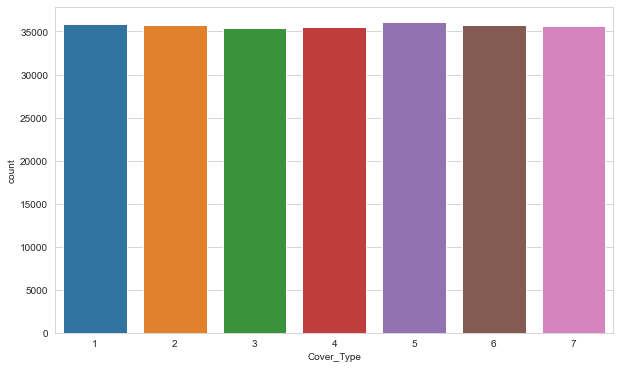

In [11]:
sns.countplot(df.Cover_Type);

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [12]:
df.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [13]:
def is_outlier(x, k):
    upper = np.quantile(x, 0.75)
    lower = np.quantile(x, 0.25)
    iqr = upper - lower
    a = upper + iqr * k
    b = lower - iqr * k
    if a > x.max():
        a = x.max()
    if b < x.min():
        b = x.min()
    print('-----',x.name,'-----')
    print('Upper Limit: ', a, '\n', 'Lower Limit: ', b, sep='')
    print('Number of outliers in the lower bound:', len(df[x<b]))
    print('Number of outliers in the upper bound:', len(df[x>a]))

#### Elevation

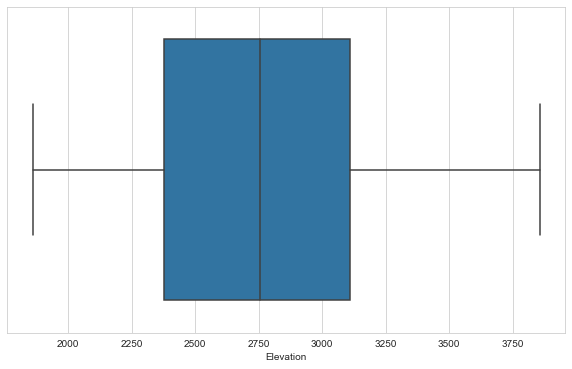

In [14]:
sns.boxplot(df.Elevation);

In [15]:
is_outlier(df.Elevation, 1.5)

----- Elevation -----
Upper Limit: 3857
Lower Limit: 1859
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0


#### Aspect

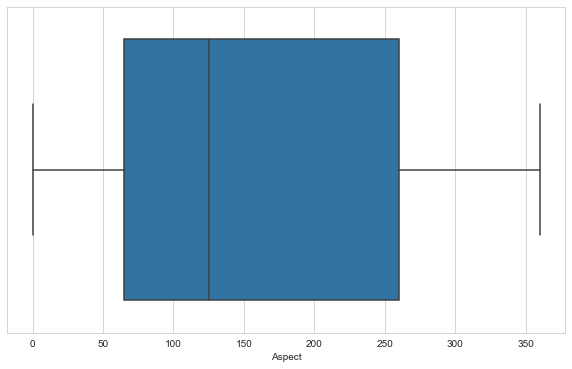

In [16]:
sns.boxplot(df.Aspect);

In [17]:
is_outlier(df.Aspect, 1.5)

----- Aspect -----
Upper Limit: 360
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0


#### Slope

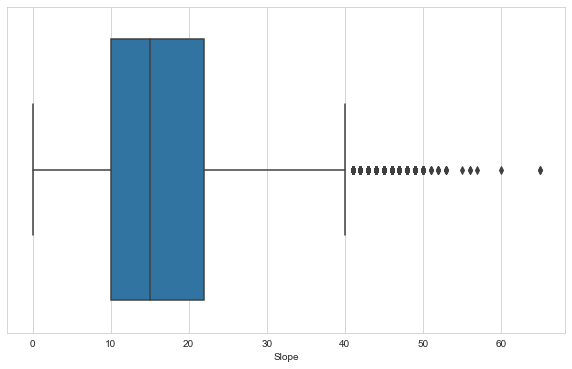

In [18]:
sns.boxplot(df.Slope);

In [19]:
is_outlier(df.Slope, 2)

----- Slope -----
Upper Limit: 46.0
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 132


In [20]:
df = df[df.Slope <= 46]

#### Horizontal_Distance_To_Hydrology

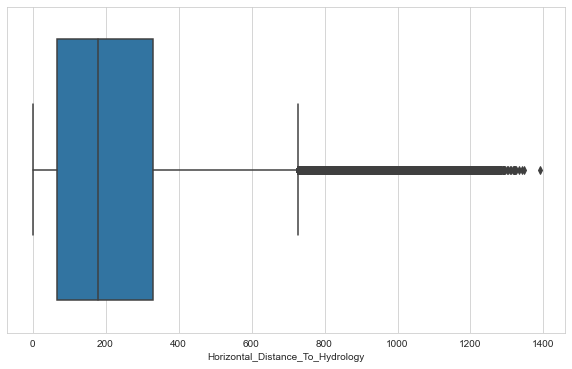

In [21]:
sns.boxplot(df['Horizontal_Distance_To_Hydrology']);

In [22]:
is_outlier(df['Horizontal_Distance_To_Hydrology'], 3)

----- Horizontal_Distance_To_Hydrology -----
Upper Limit: 1122.0
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 732


In [23]:
# df = df[df['Horizontal_Distance_To_Hydrology'] <= 1122]

#### Vertical_Distance_To_Hydrology

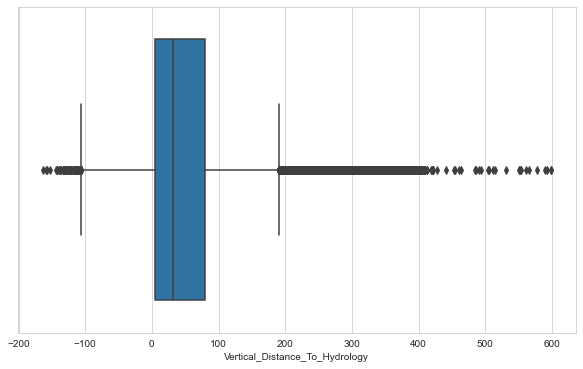

In [24]:
sns.boxplot(df['Vertical_Distance_To_Hydrology']);

In [25]:
is_outlier(df['Vertical_Distance_To_Hydrology'], 3)

----- Vertical_Distance_To_Hydrology -----
Upper Limit: 301.0
Lower Limit: -163
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 957


In [26]:
# df = df[df['Vertical_Distance_To_Hydrology'] <= 301]

In [27]:
df['distance_to_hydrology'] = (df['Horizontal_Distance_To_Hydrology'] ** 2 + df['Vertical_Distance_To_Hydrology'] ** 2) ** 0.5

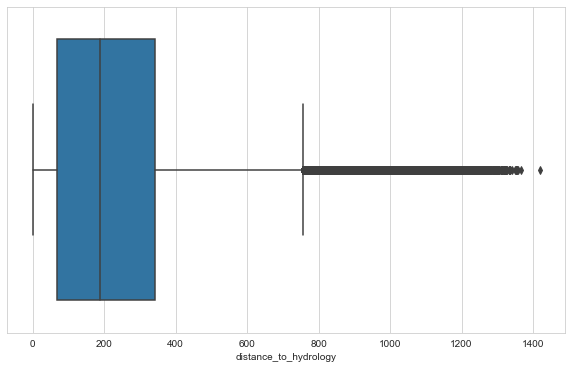

In [28]:
sns.boxplot(df['distance_to_hydrology']);

In [29]:
is_outlier(df['distance_to_hydrology'], 3)

----- distance_to_hydrology -----
Upper Limit: 1168.5589588336518
Lower Limit: 0.0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 511


In [30]:
df = df[df['distance_to_hydrology'] < 1169]

#### Horizontal_Distance_To_Roadways|

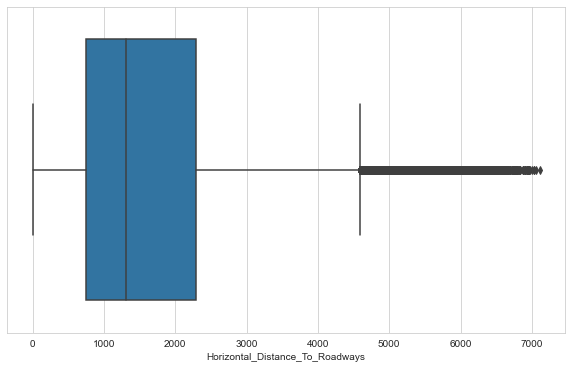

In [31]:
sns.boxplot(df['Horizontal_Distance_To_Roadways']);

In [32]:
is_outlier(df['Horizontal_Distance_To_Roadways'], 3)

----- Horizontal_Distance_To_Roadways -----
Upper Limit: 6883.0
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 21


In [33]:
# df = df[df['Horizontal_Distance_To_Roadways'] <= 66883]

#### Horizontal_Distance_To_Fire_Points

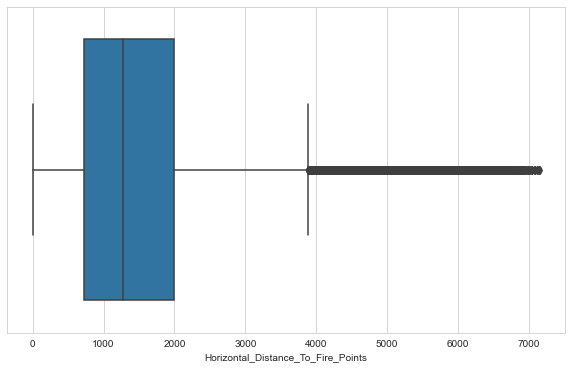

In [34]:
sns.boxplot(df['Horizontal_Distance_To_Fire_Points']);

In [35]:
is_outlier(df['Horizontal_Distance_To_Fire_Points'], 3)

----- Horizontal_Distance_To_Fire_Points -----
Upper Limit: 5780.0
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 2417


In [36]:
# df = df[df['Horizontal_Distance_To_Fire_Points'] <= 5780 ]

In [37]:
df['distance_to_city'] = (df['Horizontal_Distance_To_Roadways'] + df['Horizontal_Distance_To_Fire_Points']) / 2

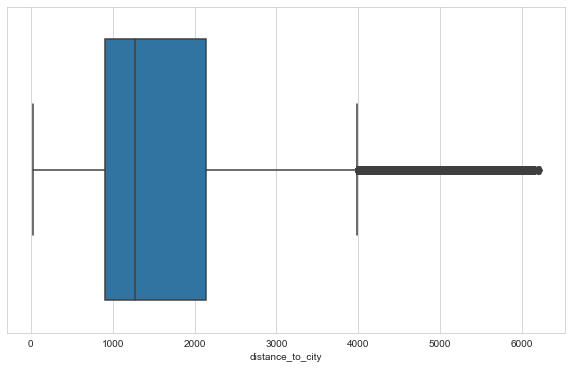

In [38]:
sns.boxplot(df['distance_to_city']);

In [39]:
is_outlier(df['distance_to_city'], 3)

----- distance_to_city -----
Upper Limit: 5824.5
Lower Limit: 21.0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 219


In [40]:
df = df[df['distance_to_city'] < 5825]

#### Hillshade_9am

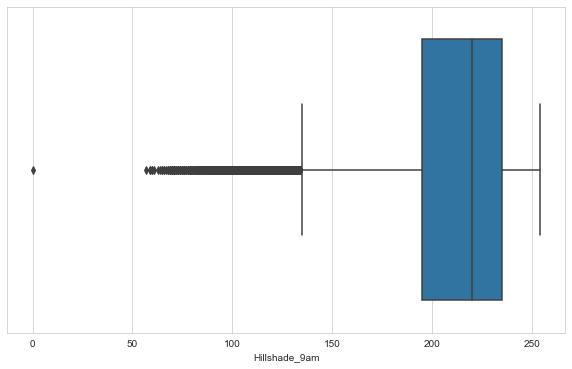

In [41]:
sns.boxplot(df['Hillshade_9am']);

In [42]:
is_outlier(df['Hillshade_9am'], 2.5)

----- Hillshade_9am -----
Upper Limit: 254
Lower Limit: 95.0
Number of outliers in the lower bound: 383
Number of outliers in the upper bound: 0


In [43]:
df = df[df['Hillshade_9am'] >= 95]

#### Hillshade_Noon

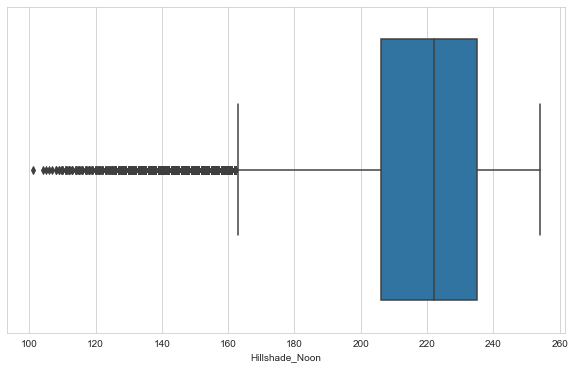

In [44]:
sns.boxplot(df['Hillshade_Noon']);

In [45]:
is_outlier(df['Hillshade_Noon'], 2.5)

----- Hillshade_Noon -----
Upper Limit: 254
Lower Limit: 133.5
Number of outliers in the lower bound: 469
Number of outliers in the upper bound: 0


In [46]:
df = df[df['Hillshade_Noon'] >= 133.5 ]

#### Hillshade_3pm

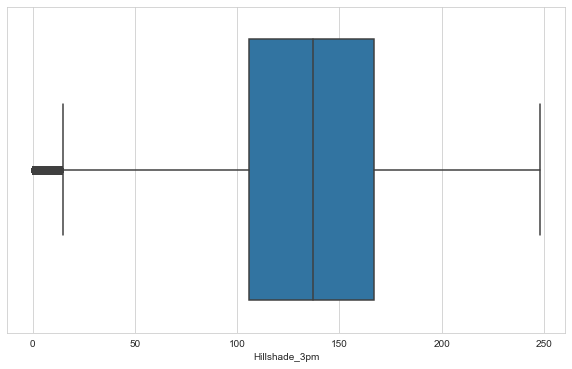

In [47]:
sns.boxplot(df['Hillshade_3pm']);

In [48]:
is_outlier(df['Hillshade_3pm'], 2.5)

----- Hillshade_3pm -----
Upper Limit: 248
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0


### Deal with Outliers

#### *i. Drop Outliers*

In [49]:
# Just dropped above

In [50]:
df.shape

(248287, 57)

In [51]:
df.drop(['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
        'Horizontal_Distance_To_Fire_Points'], axis=1, inplace=True)

### Now, let's take a closer look at correlation of continuous columns.

In [52]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Wilderness_Area_1', 'Wilderness_Area_2',
       'Wilderness_Area_3', 'Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2',
       'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6',
       'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10',
       'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14',
       'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18',
       'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22',
       'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26',
       'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30',
       'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34',
       'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38',
       'Soil_Type_39', 'Soil_Type_40', 'Cover_Type', 'distance_to_hydrology',
       'distance_to_city'],
      dtype='object')

In [53]:
df[['Elevation', 'Aspect', 'Slope','distance_to_hydrology', 'distance_to_city','Hillshade_9am', 'Hillshade_Noon',
   'Hillshade_3pm', 'Cover_Type']].corr()

,Elevation,Aspect,Slope,distance_to_hydrology,distance_to_city,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Cover_Type
Elevation,1.000,-0.022,-0.322,0.401,0.608,0.106,0.226,0.088,0.009
Aspect,-0.022,1.000,0.038,0.038,-0.014,-0.608,0.325,0.639,0.006
Slope,-0.322,0.038,1.000,-0.033,-0.305,-0.181,-0.598,-0.328,0.077
distance_to_hydrology,0.401,0.038,-0.033,1.000,0.178,-0.029,0.067,0.066,0.006
distance_to_city,0.608,-0.014,-0.305,0.178,1.000,0.057,0.214,0.117,-0.117
Hillshade_9am,0.106,-0.608,-0.181,-0.029,0.057,1.000,-0.032,-0.790,-0.021
Hillshade_Noon,0.226,0.325,-0.598,0.067,0.214,-0.032,1.000,0.616,-0.108
Hillshade_3pm,0.088,0.639,-0.328,0.066,0.117,-0.790,0.616,1.000,-0.053
Cover_Type,0.009,0.006,0.077,0.006,-0.117,-0.021,-0.108,-0.053,1.000


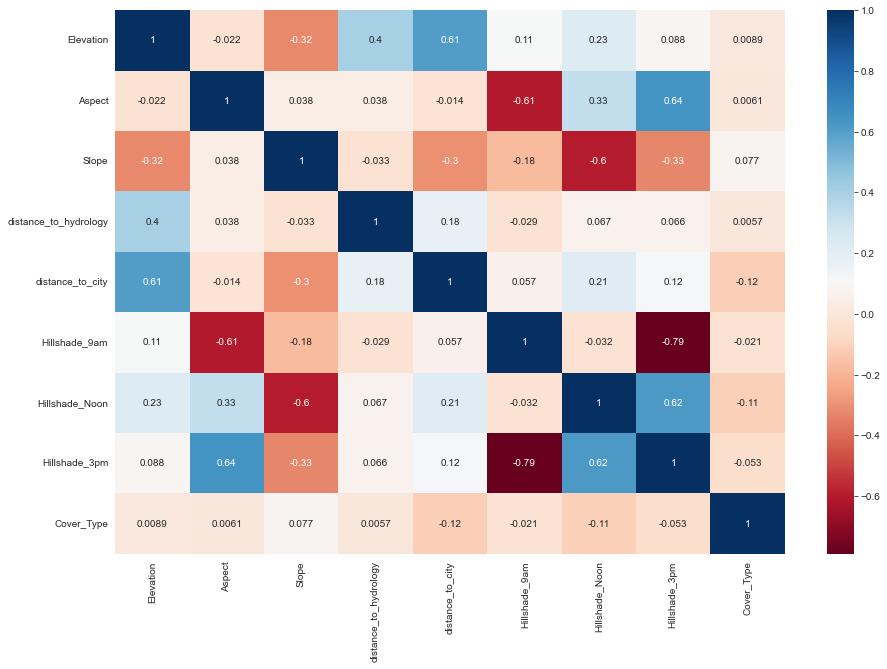

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(df[['Elevation', 'Aspect', 'Slope','distance_to_hydrology', 'distance_to_city','Hillshade_9am', 
               'Hillshade_Noon','Hillshade_3pm', 'Cover_Type']].corr(), annot=True, cmap='RdBu');

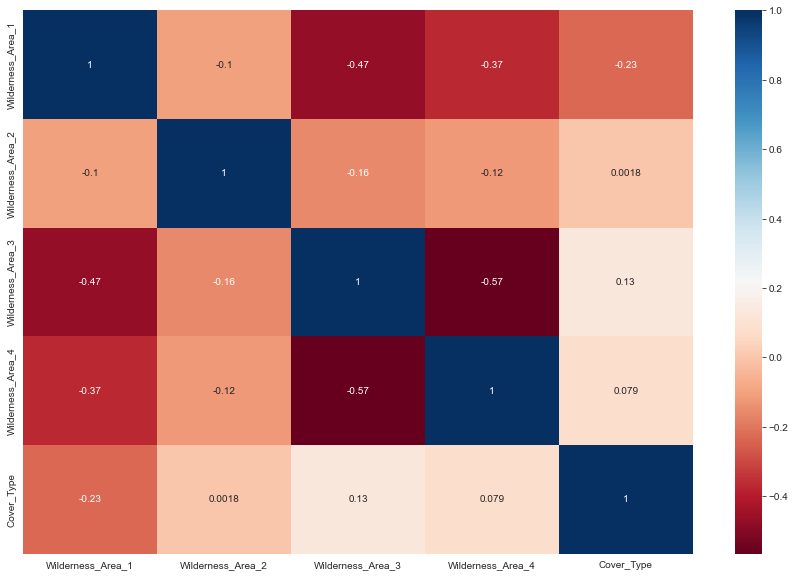

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(df[['Wilderness_Area_1', 'Wilderness_Area_2','Wilderness_Area_3', 'Wilderness_Area_4',
                'Cover_Type']].corr(), annot=True, cmap='RdBu');

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [56]:
# Made some feature engineering above.

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### 1. Import Libraries

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [67]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### 2. Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [68]:
X=df.drop(["Cover_Type"], axis=1)
y=df["Cover_Type"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

### 3. Implement Support Vector Machines
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [70]:
operations = [("scaler", MinMaxScaler()), ("SVC", LinearSVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

In [71]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[4702 1043   10    0  440   77  865]
 [1807 3430  155    4 1326  327   47]
 [   0   23 3463 1043  432 2016    0]
 [   0    0  336 6510    0  260    0]
 [ 257 1143  563    0 4822  410    0]
 [   0  253 1113  869  783 4103    0]
 [ 743    0   26    0   24    0 6233]]
              precision    recall  f1-score   support

           1       0.63      0.66      0.64      7137
           2       0.58      0.48      0.53      7096
           3       0.61      0.50      0.55      6977
           4       0.77      0.92      0.84      7106
           5       0.62      0.67      0.64      7195
           6       0.57      0.58      0.57      7121
           7       0.87      0.89      0.88      7026

    accuracy                           0.67     49658
   macro avg       0.66      0.67      0.66     49658
weighted avg       0.66      0.67      0.66     49658


Train_Set
[[18650  4231    24     0  1734   295  3614]
 [ 7166 13714   646    15  5372  1297   174]
 [    0    97 13708  4119 

##### Cross Validation

In [79]:
operations = [("scaler", MinMaxScaler()), ("SVC", LinearSVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", 
                                                                 "f1_micro"], cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,20.598,0.076,0.672,0.672,0.672,0.672
2,19.935,0.077,0.667,0.667,0.667,0.667
3,19.285,0.078,0.669,0.669,0.669,0.669
4,19.620,0.077,0.668,0.668,0.668,0.668
5,19.363,0.084,0.666,0.666,0.666,0.666


In [80]:
df_scores.mean()[2:]

test_accuracy          0.668
test_precision_micro   0.668
test_recall_micro      0.668
test_f1_micro          0.668
dtype: float64

In [82]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('SVC', LinearSVC(random_state=42))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'SVC': LinearSVC(random_state=42),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'SVC__C': 1.0,
 'SVC__class_weight': None,
 'SVC__dual': True,
 'SVC__fit_intercept': True,
 'SVC__intercept_scaling': 1,
 'SVC__loss': 'squared_hinge',
 'SVC__max_iter': 1000,
 'SVC__multi_class': 'ovr',
 'SVC__penalty': 'l2',
 'SVC__random_state': 42,
 'SVC__tol': 0.0001,
 'SVC__verbose': 0}

##### Finding the Best Parameters with GridSearchCV

In [86]:
param_grid = {'SVC__C': [0.01, 0.1, 1],
              'SVC__penalty': ['l1', 'l2'],
             'SVC__class_weight': [None, 'balanced']}

In [87]:
operations = [("scaler", MinMaxScaler()), ("SVC", LinearSVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model, param_grid, scoring="accuracy", cv=5)

In [88]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC', LinearSVC(random_state=42))]),
             param_grid={'SVC__C': [0.01, 0.1, 1],
                         'SVC__class_weight': [None, 'balanced'],
                         'SVC__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [139]:
svm_model_grid.best_params_

{'SVC__C': 1, 'SVC__class_weight': 'balanced', 'SVC__penalty': 'l2'}

In [90]:
svm_model_grid.best_index_

11

In [91]:
svm_model_grid.best_score_

0.6684421576661046

In [92]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[4695 1052   10    0  436   77  867]
 [1803 3447  157    4 1311  326   48]
 [   0   23 3492 1032  432 1998    0]
 [   0    0  347 6501    0  258    0]
 [ 263 1159  566    0 4798  409    0]
 [   0  254 1134  866  781 4086    0]
 [ 740    0   26    0   24    0 6236]]
              precision    recall  f1-score   support

           1       0.63      0.66      0.64      7137
           2       0.58      0.49      0.53      7096
           3       0.61      0.50      0.55      6977
           4       0.77      0.91      0.84      7106
           5       0.62      0.67      0.64      7195
           6       0.57      0.57      0.57      7121
           7       0.87      0.89      0.88      7026

    accuracy                           0.67     49658
   macro avg       0.66      0.67      0.66     49658
weighted avg       0.66      0.67      0.66     49658


Train_Set
[[18608  4279    24     0  1711   294  3632]
 [ 7135 13761   655    15  5354  1289   175]
 [    0    96 13861  4086 

In [93]:
operations = [("scaler", MinMaxScaler()), ("SVC", LinearSVC(C=1, class_weight="balanced", penalty='l2', 
                                                            random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", 
                                                                 "f1_micro"], cv = 5)
df_scores_svc = pd.DataFrame(scores, index = range(1, 6))
df_scores_svc.mean()[2:]

test_accuracy          0.668
test_precision_micro   0.668
test_recall_micro      0.668
test_f1_micro          0.668
dtype: float64

In [151]:
y_pred_svm = svm_model_grid.predict(X_test)
my_dict = {'Actual': y_test, 'Pred': y_pred_svm, 'Residual': y_test-y_pred_svm}
compare_svm = pd.DataFrame(my_dict)

In [152]:
comp_sample_svm = compare_svm.sample(20)
comp_sample_svm

,Actual,Pred,Residual
8932,7,7,0
81486,3,4,-1
17416,6,4,2
190736,6,6,0
57155,1,1,0
208230,2,1,1
200871,2,2,0
187604,5,5,0
150064,5,5,0
225122,1,1,0


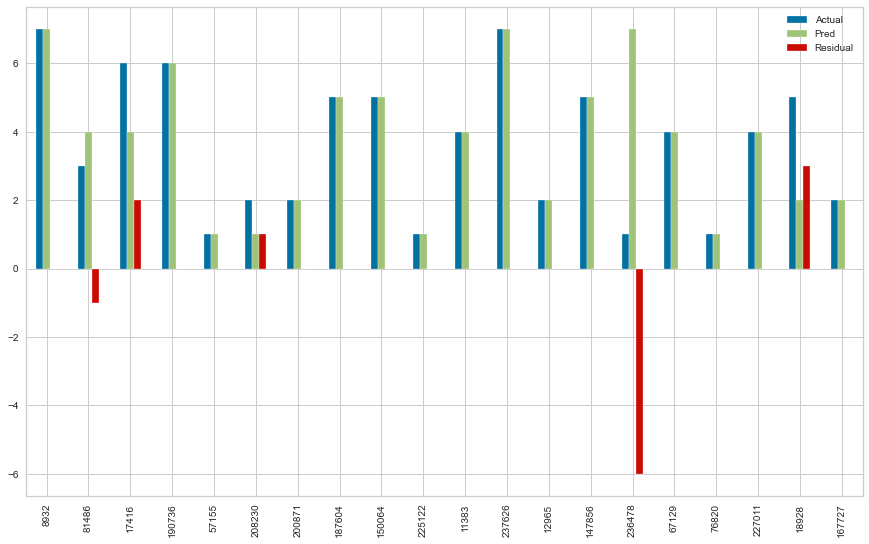

In [153]:
comp_sample_svm.plot(kind='bar',figsize=(15,9))
plt.show()

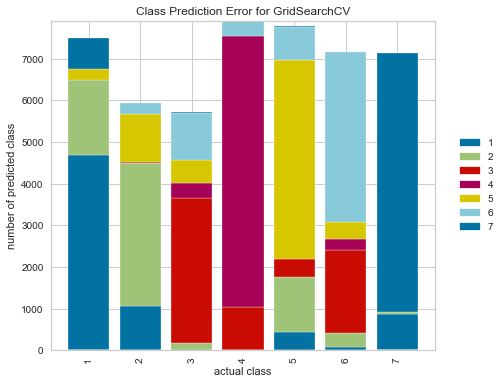

In [179]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(svm_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [94]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

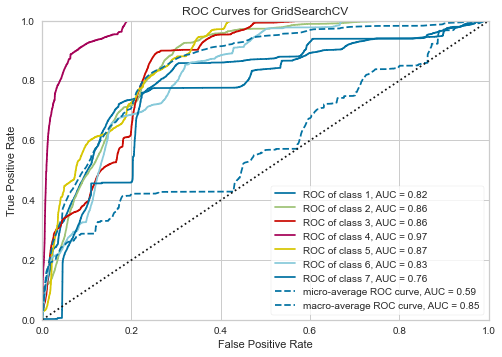

In [95]:
from yellowbrick.classifier import ROCAUC

model = svm_model_grid
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show(); 

In [97]:
df_scores_svc

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,22.795,0.080,0.672,0.672,0.672,0.672
2,22.139,0.080,0.667,0.667,0.667,0.667
3,19.685,0.079,0.669,0.669,0.669,0.669
4,22.025,0.097,0.668,0.668,0.668,0.668
5,19.897,0.079,0.666,0.666,0.666,0.666


### 4. Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [123]:
DT_model = DecisionTreeClassifier(random_state=101)

In [124]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [125]:
y_pred_tree = DT_model.predict(X_test)

In [126]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[5854 1077    2    0   42    7  155]
 [1094 5602  100    0  185   95   20]
 [   1   51 6500   92   20  313    0]
 [   0    0   53 7013    0   40    0]
 [  27   98    7    0 7058    5    0]
 [   5   40  336   40   17 6683    0]
 [ 116   11    0    0    0    0 6899]]
              precision    recall  f1-score   support

           1       0.82      0.82      0.82      7137
           2       0.81      0.79      0.80      7096
           3       0.93      0.93      0.93      6977
           4       0.98      0.99      0.98      7106
           5       0.96      0.98      0.97      7195
           6       0.94      0.94      0.94      7121
           7       0.98      0.98      0.98      7026

    accuracy                           0.92     49658
   macro avg       0.92      0.92      0.92     49658
weighted avg       0.92      0.92      0.92     49658


Train_Set
[[28548     0     0     0     0     0     0]
 [    0 28384     0     0     0     0     0]
 [    0     0 27910     0 

##### Cross Validation

In [128]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", 
                                                            "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,2.597,0.045,0.918,0.918,0.918,0.918
2,2.518,0.038,0.917,0.917,0.917,0.917
3,2.532,0.039,0.914,0.914,0.914,0.914
4,2.501,0.040,0.916,0.916,0.916,0.916
5,2.492,0.038,0.914,0.914,0.914,0.914
6,2.505,0.038,0.916,0.916,0.916,0.916
7,2.505,0.038,0.914,0.914,0.914,0.914
8,2.474,0.039,0.915,0.915,0.915,0.915
9,2.486,0.038,0.913,0.913,0.913,0.913
10,2.501,0.038,0.912,0.912,0.912,0.912


In [129]:
df_scores.mean()[2:]

test_accuracy          0.915
test_precision_micro   0.915
test_recall_micro      0.915
test_f1_micro          0.915
dtype: float64

##### Finding the Best Parameters with GridSearchCV

In [130]:
model = DecisionTreeClassifier(random_state=101)
param_grid = {"splitter":["best","random"],
              "max_features":[None,"auto","log2",2,3,4],
              "max_depth": [None, 2,3,4,5]}

In [131]:
dt_model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=5,
                          n_jobs = -1)

In [132]:
dt_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [133]:
dt_model_grid.best_params_

{'max_depth': None, 'max_features': None, 'splitter': 'best'}

In [134]:
eval_metric(dt_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[5854 1077    2    0   42    7  155]
 [1094 5602  100    0  185   95   20]
 [   1   51 6500   92   20  313    0]
 [   0    0   53 7013    0   40    0]
 [  27   98    7    0 7058    5    0]
 [   5   40  336   40   17 6683    0]
 [ 116   11    0    0    0    0 6899]]
              precision    recall  f1-score   support

           1       0.82      0.82      0.82      7137
           2       0.81      0.79      0.80      7096
           3       0.93      0.93      0.93      6977
           4       0.98      0.99      0.98      7106
           5       0.96      0.98      0.97      7195
           6       0.94      0.94      0.94      7121
           7       0.98      0.98      0.98      7026

    accuracy                           0.92     49658
   macro avg       0.92      0.92      0.92     49658
weighted avg       0.92      0.92      0.92     49658


Train_Set
[[28548     0     0     0     0     0     0]
 [    0 28384     0     0     0     0     0]
 [    0     0 27910     0 

In [136]:
model = DecisionTreeClassifier(max_depth=None, max_features=None, splitter='best', random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", 
                                                            "f1_micro"], cv = 10)
df_scores_tree = pd.DataFrame(scores, index = range(1, 11))
df_scores_tree

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,2.675,0.044,0.918,0.918,0.918,0.918
2,2.630,0.041,0.917,0.917,0.917,0.917
3,2.512,0.038,0.914,0.914,0.914,0.914
4,2.503,0.040,0.916,0.916,0.916,0.916
5,2.610,0.050,0.914,0.914,0.914,0.914
6,3.065,0.041,0.916,0.916,0.916,0.916
7,2.552,0.039,0.914,0.914,0.914,0.914
8,2.934,0.043,0.915,0.915,0.915,0.915
9,2.760,0.038,0.913,0.913,0.913,0.913
10,2.619,0.043,0.912,0.912,0.912,0.912


In [137]:
df_scores_tree.mean()[2:]

test_accuracy          0.915
test_precision_micro   0.915
test_recall_micro      0.915
test_f1_micro          0.915
dtype: float64

In [145]:
y_pred_tree = dt_model_grid.predict(X_test)
my_dict = {'Actual': y_test, 'Pred': y_pred_tree, 'Residual': y_test-y_pred_tree}
compare_tree = pd.DataFrame(my_dict)

In [146]:
comp_sample_tree = compare_tree.sample(20)
comp_sample_tree

,Actual,Pred,Residual
17416,6,4,2
53082,1,1,0
211116,5,5,0
202765,3,3,0
199976,6,6,0
153951,4,4,0
171794,1,2,-1
207298,6,6,0
223454,3,3,0
149967,3,3,0


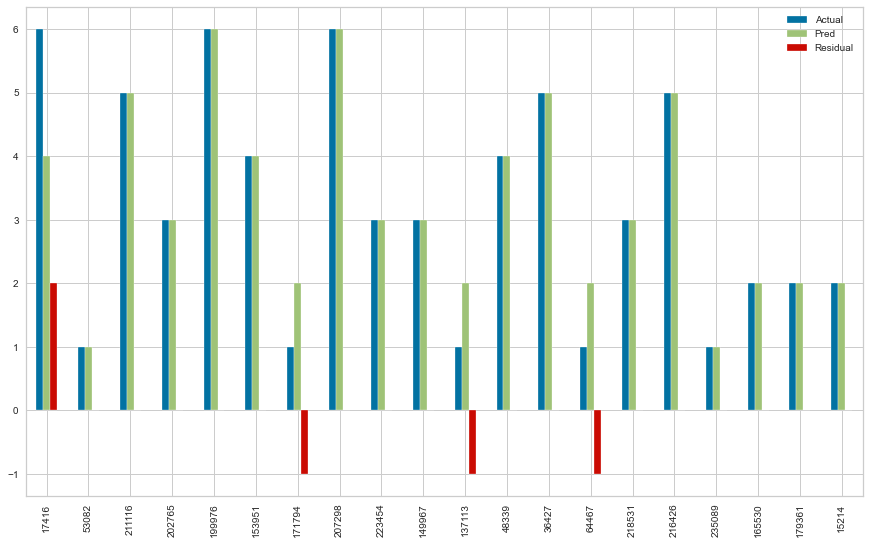

In [147]:
comp_sample_tree.plot(kind='bar',figsize=(15,9))
plt.show()

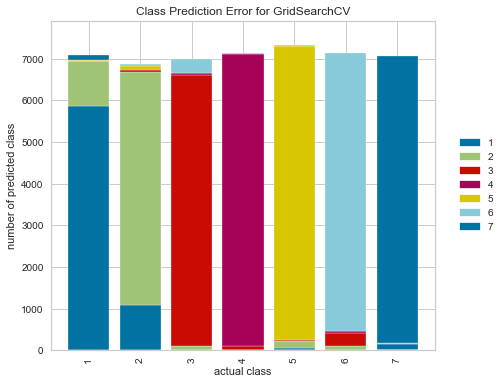

In [138]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(dt_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

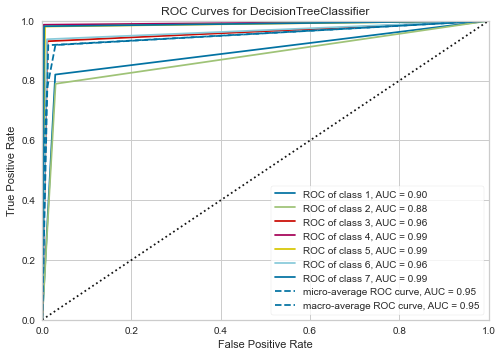

In [159]:
from yellowbrick.classifier import ROCAUC

dt_model = DecisionTreeClassifier(max_depth=None, max_features=None, splitter='best', random_state=101)
visualizer = ROCAUC(dt_model)

visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show(); 

In [154]:
df_scores_tree

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,2.675,0.044,0.918,0.918,0.918,0.918
2,2.630,0.041,0.917,0.917,0.917,0.917
3,2.512,0.038,0.914,0.914,0.914,0.914
4,2.503,0.040,0.916,0.916,0.916,0.916
5,2.610,0.050,0.914,0.914,0.914,0.914
6,3.065,0.041,0.916,0.916,0.916,0.916
7,2.552,0.039,0.914,0.914,0.914,0.914
8,2.934,0.043,0.915,0.915,0.915,0.915
9,2.760,0.038,0.913,0.913,0.913,0.913
10,2.619,0.043,0.912,0.912,0.912,0.912


### 5. Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[6186  765    4    0   40   11  131]
 [ 793 5915   96    1  163  112   16]
 [   0   11 6556   88   12  310    0]
 [   0    0    7 7093    0    6    0]
 [   0   39   13    0 7138    5    0]
 [   0    5  146   41    7 6922    0]
 [  50    2    0    0    0    0 6974]]
              precision    recall  f1-score   support

           1       0.88      0.87      0.87      7137
           2       0.88      0.83      0.86      7096
           3       0.96      0.94      0.95      6977
           4       0.98      1.00      0.99      7106
           5       0.97      0.99      0.98      7195
           6       0.94      0.97      0.96      7121
           7       0.98      0.99      0.99      7026

    accuracy                           0.94     49658
   macro avg       0.94      0.94      0.94     49658
weighted avg       0.94      0.94      0.94     49658


Train_Set
[[28548     0     0     0     0     0     0]
 [    0 28384     0     0     0     0     0]
 [    0     0 27910     0 

##### Cross Validation

In [163]:
model = RandomForestClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", 
                                                            "f1_micro"], cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,36.444,1.745,0.936,0.936,0.936,0.936
2,37.487,1.820,0.937,0.937,0.937,0.937
3,34.562,1.462,0.936,0.936,0.936,0.936
4,32.600,1.626,0.936,0.936,0.936,0.936
5,35.370,1.820,0.935,0.935,0.935,0.935


In [164]:
df_scores.mean()[2:]

test_accuracy          0.936
test_precision_micro   0.936
test_recall_micro      0.936
test_f1_micro          0.936
dtype: float64

##### Finding the Best Parameters with GridSearchCV

In [ ]:
# These parameters are very limited. This is because the model takes too long to complete.

In [169]:
param_grid = {'n_estimators':[64, 100, 128],
             'max_features':[2, "auto"],
             'max_depth':[None, 3, 5]}

In [170]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_model_grid = GridSearchCV(model, param_grid, scoring = "f1_micro", n_jobs = -1).fit(X_train, y_train)
# I didn't add cv into the model due to time restrictions

In [171]:
rf_model_grid.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 128}

In [172]:
eval_metric(rf_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[6194  752    3    0   35   14  139]
 [ 790 5914   97    0  172  108   15]
 [   0   11 6553   86   10  317    0]
 [   0    0    6 7093    0    7    0]
 [   0   42   12    0 7139    2    0]
 [   0    6  152   45    8 6910    0]
 [  45    3    0    0    0    0 6978]]
              precision    recall  f1-score   support

           1       0.88      0.87      0.87      7137
           2       0.88      0.83      0.86      7096
           3       0.96      0.94      0.95      6977
           4       0.98      1.00      0.99      7106
           5       0.97      0.99      0.98      7195
           6       0.94      0.97      0.95      7121
           7       0.98      0.99      0.99      7026

    accuracy                           0.94     49658
   macro avg       0.94      0.94      0.94     49658
weighted avg       0.94      0.94      0.94     49658


Train_Set
[[28548     0     0     0     0     0     0]
 [    0 28384     0     0     0     0     0]
 [    0     0 27910     0 

In [173]:
model = RandomForestClassifier(class_weight = "balanced", n_estimators=128, random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", 
                                                            "f1_micro"], cv = 5)
df_scores_rf = pd.DataFrame(scores, index = range(1, 6))
df_scores_rf

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,41.388,1.901,0.937,0.937,0.937,0.937
2,41.542,1.909,0.938,0.938,0.938,0.938
3,45.689,2.198,0.935,0.935,0.935,0.935
4,46.279,2.032,0.937,0.937,0.937,0.937
5,46.583,2.214,0.936,0.936,0.936,0.936


In [174]:
df_scores_rf.mean()[2:]

test_accuracy          0.936
test_precision_micro   0.936
test_recall_micro      0.936
test_f1_micro          0.936
dtype: float64

In [175]:
y_pred_rf = rf_model_grid.predict(X_test)
my_dict = {'Actual': y_test, 'Pred': y_pred_rf, 'Residual': y_test-y_pred_rf}
compare_rf = pd.DataFrame(my_dict)

In [176]:
comp_sample_rf = compare_rf.sample(20)
comp_sample_rf

,Actual,Pred,Residual
1070,2,2,0
151794,4,4,0
155350,6,6,0
60095,3,3,0
193057,3,3,0
110057,4,4,0
225018,1,2,-1
62778,4,4,0
27324,5,5,0
9803,6,6,0


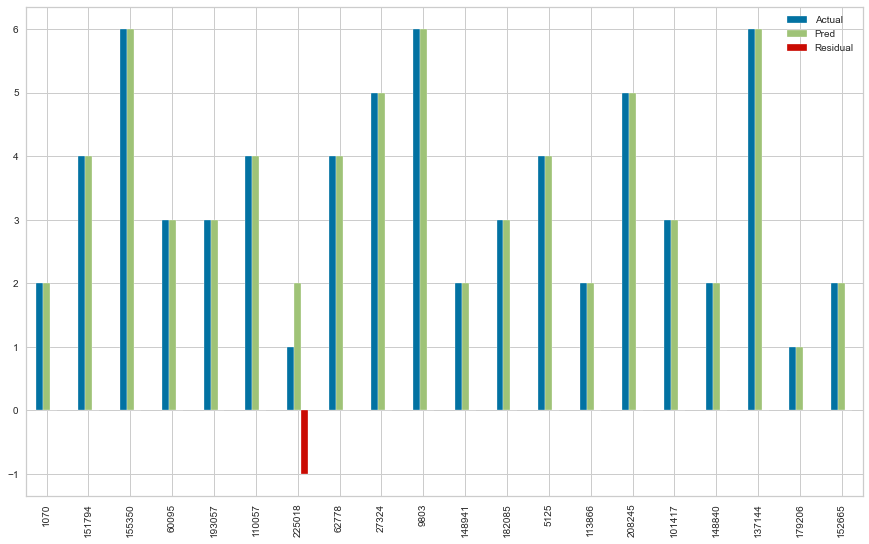

In [177]:
comp_sample_rf.plot(kind='bar',figsize=(15,9))
plt.show()

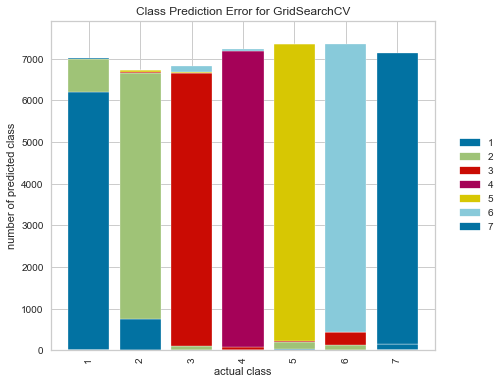

In [178]:
visualizer = ClassPredictionError(rf_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

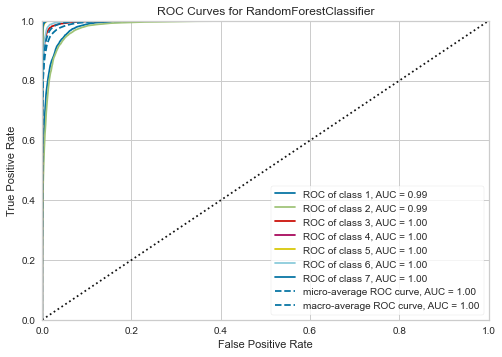

In [180]:
from yellowbrick.classifier import ROCAUC

rf_model = RandomForestClassifier(class_weight = "balanced", n_estimators=128, random_state=101)
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show(); 

In [181]:
df_scores_rf

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,41.388,1.901,0.937,0.937,0.937,0.937
2,41.542,1.909,0.938,0.938,0.938,0.938
3,45.689,2.198,0.935,0.935,0.935,0.935
4,46.279,2.032,0.937,0.937,0.937,0.937
5,46.583,2.214,0.936,0.936,0.936,0.936


In [204]:
svc_res = pd.DataFrame(df_scores_svc.mean()[2:], columns=['SVC'])
tree_res = pd.DataFrame(df_scores_tree.mean()[2:], columns=['Decision Tree'])
rf_res = pd.DataFrame(df_scores_rf.mean()[2:], columns=['Random Forest'])

In [223]:
pd.merge(svc_res.iloc[:,0], tree_res.iloc[:,0], left_index=True, right_index=True).merge(rf_res.iloc[:,0],
                                                                    left_index=True, right_index=True)

,SVC,Decision Tree,Random Forest
test_accuracy,0.668,0.915,0.936
test_precision_micro,0.668,0.915,0.936
test_recall_micro,0.668,0.915,0.936
test_f1_micro,0.668,0.915,0.936


### Implement XGBoost Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

# F1 Score Comparison

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___